<a href="https://colab.research.google.com/github/AbhishekPatil1404/Car-Price-Predictio-using-decisionTreeRegressor/blob/main/Logistic_Regression(Titanic_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps

1. Impotring the libraries
2. import the dataset
3. Perform the data analysis(DM,DE,DC,DV,EDA)
4. Feature Scaling[Optional]
5. Encoding
6. Frature Selection
7. Choosing the model - Logistic Regerssion
8. Split the data - CV
9. Training the model
10. Test the model
11. Performance - Confusion Matric

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold

# Import the dataset

In [ ]:
df = pd.read_csv('/content/titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

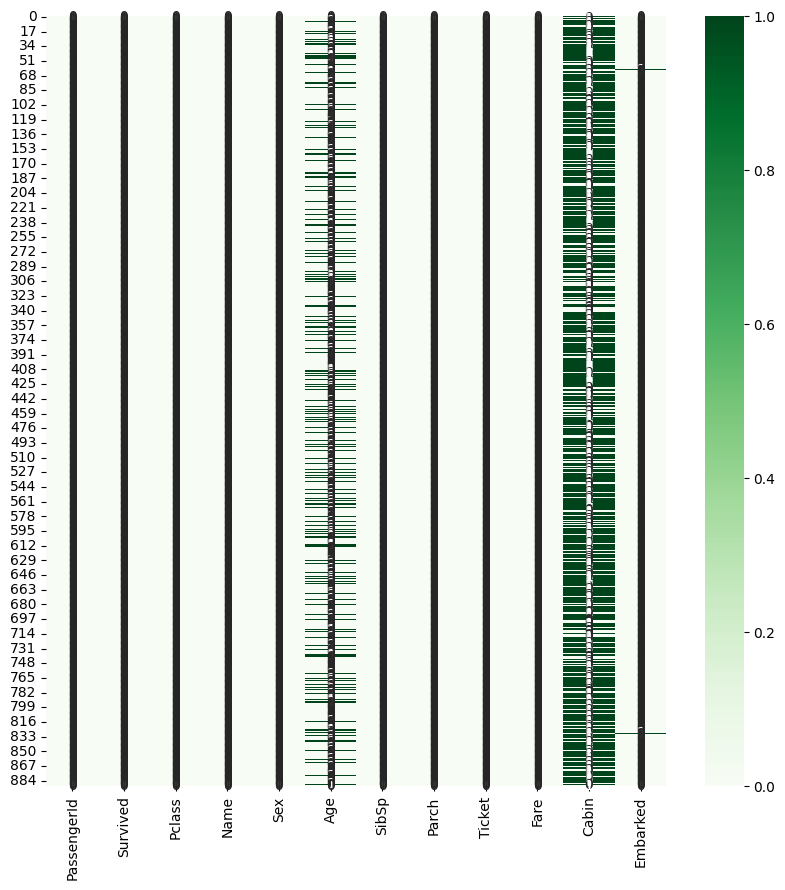

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), annot = True, cmap = 'Greens')

In [ ]:
# Age % of null values
(df.Age.isnull().sum()/len(df.Age))*100

19.865319865319865

In [ ]:
# Cabin % of null values
(df.Cabin.isnull().sum()/len(df.Cabin))*100


77.10437710437711

In [ ]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Dropping Cabin Feature
df.drop('Cabin', axis = 1, inplace = True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
df.Embarked.unique()
# S - Southampton
# Q - Queenstown
# C - Cherbourg

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
# Show the datapoints where the Embarked is null
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [ ]:
# Show all the Embarked value where Pclass = 1
df.loc[df.Pclass ==1, 'Embarked'].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [ ]:
# Show all the Embarked value where Pclass = 2
df.loc[df.Pclass ==2, 'Embarked'].value_counts()

S    164
C     17
Q      3
Name: Embarked, dtype: int64

In [ ]:
# Show all the Embarked value where Pclass = 3
df.loc[df.Pclass ==3, 'Embarked'].value_counts()

S    353
Q     72
C     66
Name: Embarked, dtype: int64

In [ ]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
# Mean of Age column
df.Age.mean()

29.69911764705882

In [ ]:
# median of Age column
df.Age.median()

28.0

In [ ]:
# mode of Age column
df.Age.mode()

0    24.0
Name: Age, dtype: float64

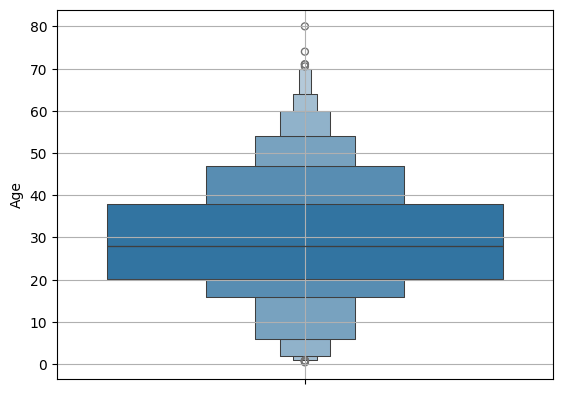

In [ ]:
# Plotting a boxplot to find the outliers in the ahe columns
sns.boxenplot(df.Age)
plt.grid()

In [ ]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [ ]:
df.shape

(891, 11)

In [ ]:
# Fill all the null values in the age column with its median value
df.Age.fillna(value=df.Age.median(), inplace = True)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Drop the rows where Embarked is null
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.shape

(889, 11)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
#Drop off the columns - PassengerId  Name  Ticket
df.drop(['PassengerId', 'Name', 'Ticket'], inplace= True, axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


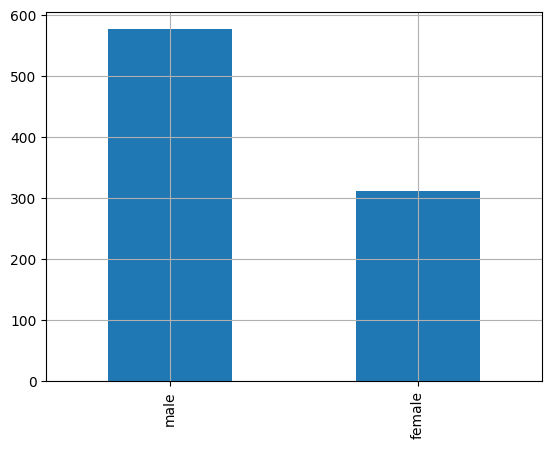

In [ ]:
#Plot a graph : Strength of Male V/s Strength of Female
df.Sex.value_counts().plot.bar(df.Sex)
plt.grid()

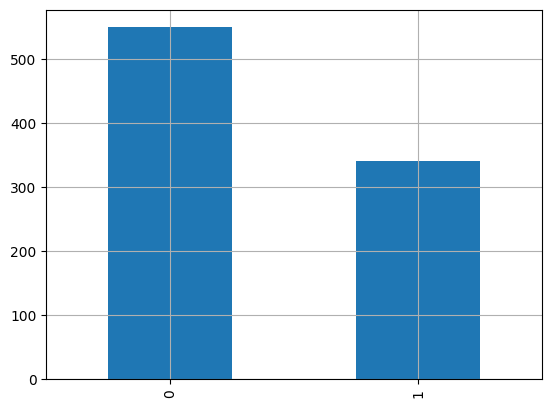

In [ ]:
#Plot a graph : Strength of Survival V/s Strength of Non-Survival
df.Survived.value_counts().plot.bar(df.Survived)
plt.grid()

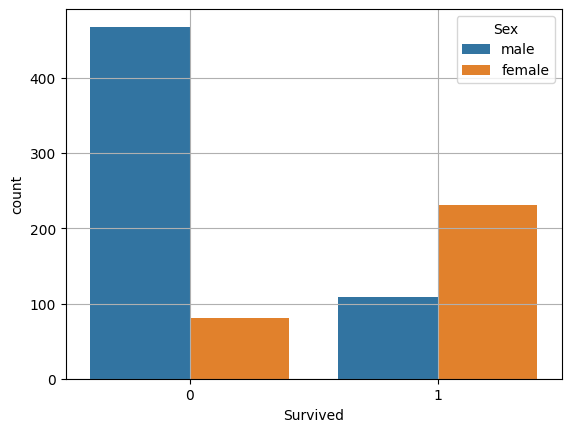

In [ ]:
# Plot a graph to find out the survival and non-survival rate w.r.t Sex
sns.countplot(x ='Survived', data=df, hue='Sex')
plt.grid()

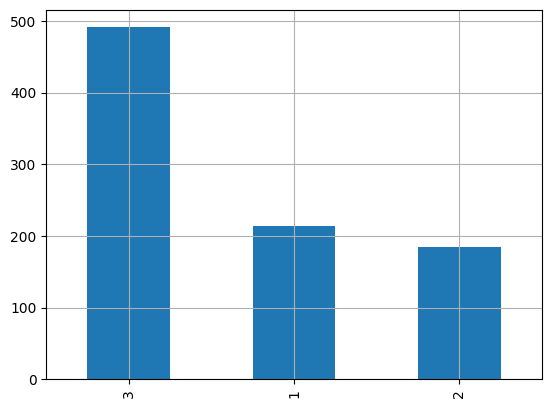

In [ ]:
# Plot a graph to find out the strength of the Pclass
df.Pclass.value_counts().plot.bar(df.Pclass)
plt.grid()

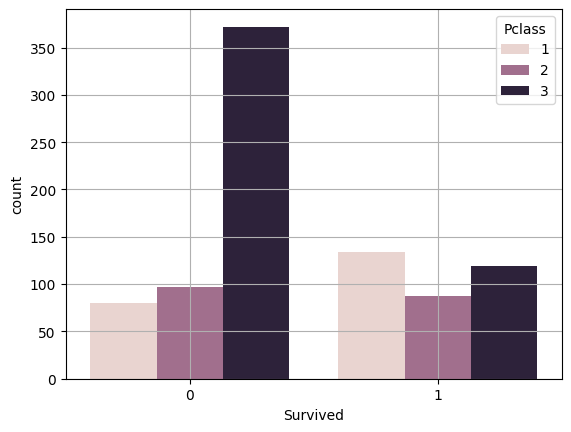

In [ ]:
# Plot a graph to find out the survival and non-survival rate w.r.t Pclass
sns.countplot(x ='Survived', data=df, hue='Pclass')
plt.grid()

# Encoders - To convert the data from the catagorical form to numerical form without channging its meaning

In [ ]:
# Label encoding for the column Sex
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc = LabelEncoder()

In [ ]:
df.Sex = enc.fit_transform(df.Sex)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.5+ KB


In [ ]:
df['Age'] = df['Age'].astype(int)


In [ ]:
df.Fare = round(df.Fare, 2)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,NaN,1,0,7.25,S
1,1,1,0,NaN,1,0,71.28,C
2,1,3,0,NaN,0,0,7.92,S
3,1,1,0,NaN,1,0,53.10,S
4,0,3,1,NaN,0,0,8.05,S


In [ ]:
# One Hot encoding for the column Embarked
df = pd.concat([df, pd.get_dummies(df['Embarked'])], axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,NaN,1,0,7.25,S,0,0,1
1,1,1,0,NaN,1,0,71.28,C,1,0,0
2,1,3,0,NaN,0,0,7.92,S,0,0,1
3,1,1,0,NaN,1,0,53.10,S,0,0,1
4,0,3,1,NaN,0,0,8.05,S,0,0,1


In [ ]:
df.drop(['Embarked', 'C'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(1), int64(6), uint8(2)
memory usage: 57.3 KB


<Axes: >

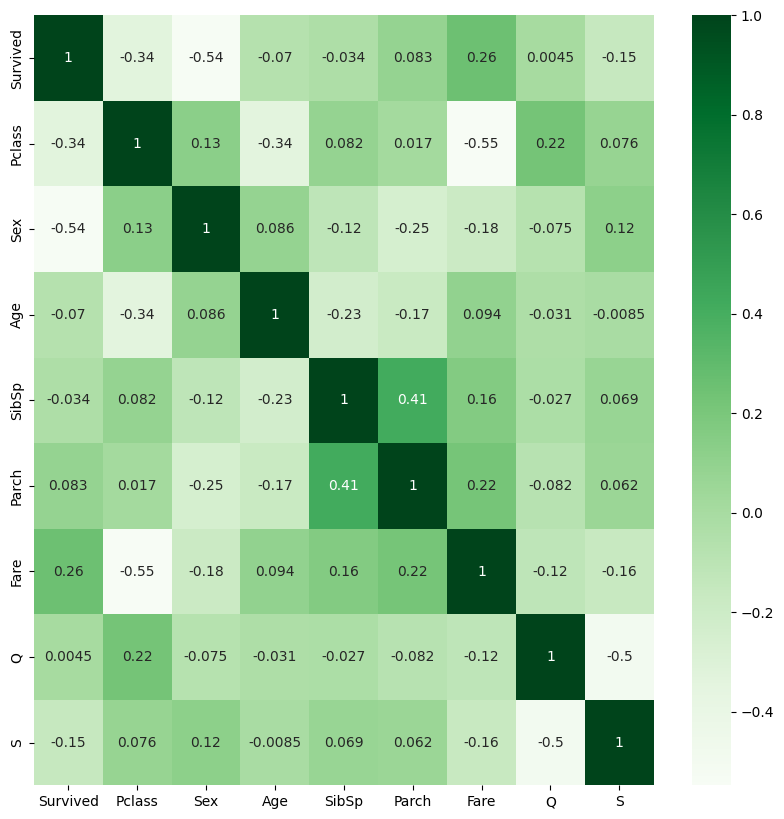

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, cmap ='Greens')

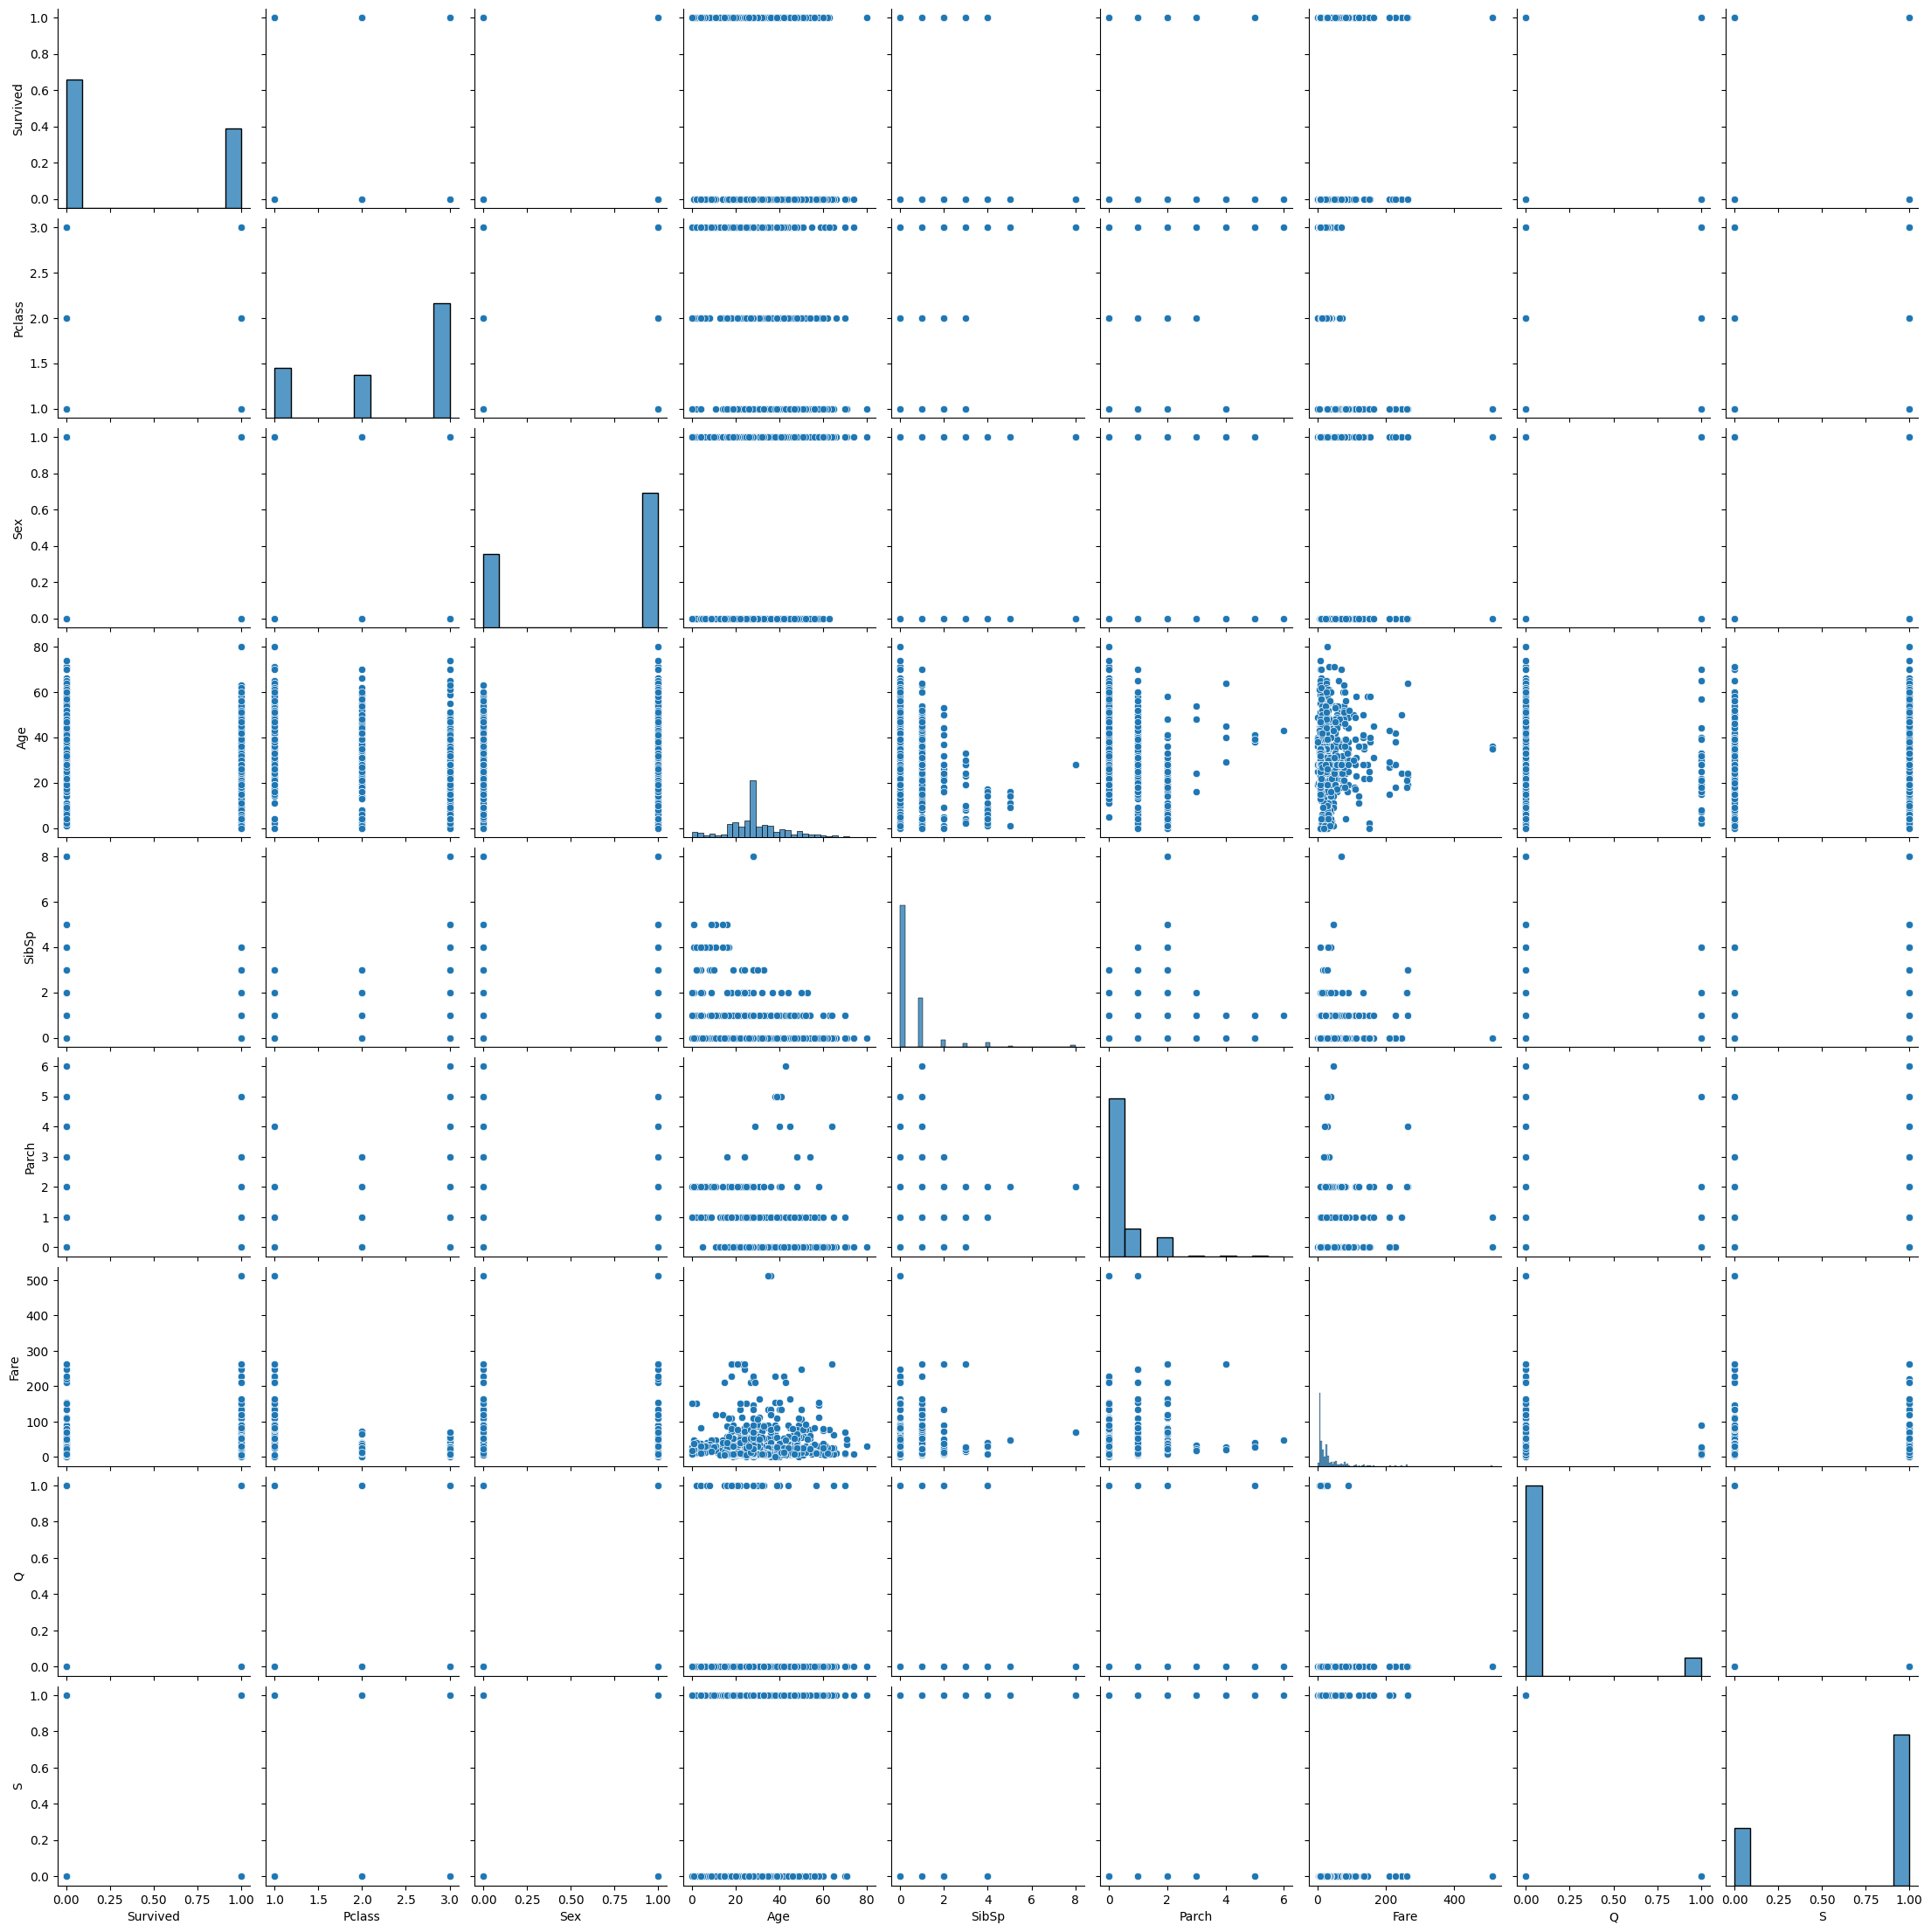

In [ ]:
sns.pairplot(df)

# Feature Importance/ Feature Selection

In [ ]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [ ]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
feat = ExtraTreesClassifier()

In [ ]:
feat.fit(X,Y)

ExtraTreesClassifier()

In [ ]:
feat.feature_importances_

array([0.10724545, 0.28536298, 0.24236605, 0.04835533, 0.04401891,
       0.24252194, 0.00978945, 0.0203399 ])

<Axes: >

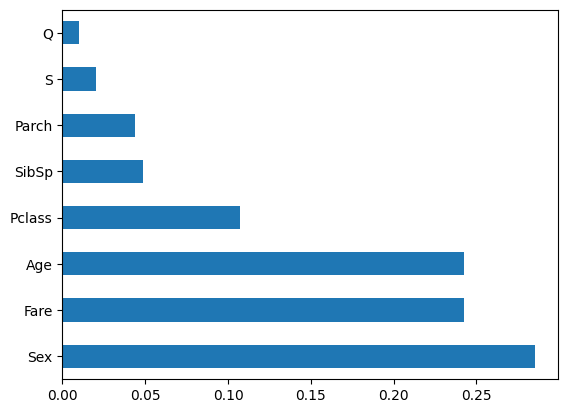

In [ ]:
feat_imp = pd.Series(feat.feature_importances_, index=X.columns)
feat_imp.nlargest(8).plot(kind='barh')

# Splitting of the data

In [ ]:
skf = StratifiedKFold(n_splits=5)

In [ ]:
for train_index, test_index in skf.split(X,Y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

In [ ]:
Y_test

0      0
1      1
2      1
3      1
4      0
      ..
714    0
715    0
718    0
719    0
721    0
Name: Survived, Length: 712, dtype: int64

# Model Selection

In [ ]:
classifier = LogisticRegression()

# Training the model

In [ ]:
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Test the model

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
final = pd.DataFrame({"Actual":Y_test, "Predicted":Y_pred})

In [ ]:
final.head()

,Actual,Predicted
706,1,1
707,1,0
708,1,1
709,1,0
710,1,1


<Axes: >

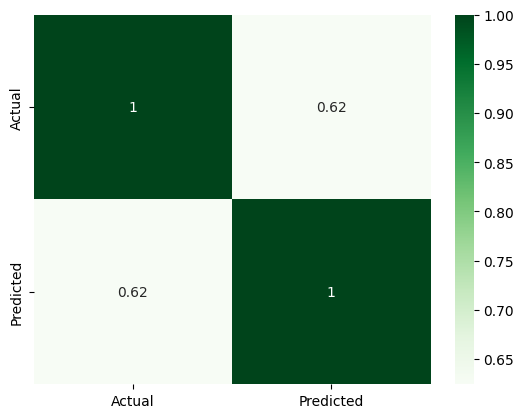

In [ ]:
sns.heatmap(final.corr(), annot = True, cmap = "Greens")

# Performance Matrix - Confusion Matrix

In [ ]:
confusion_matrix(Y_test, Y_pred)

array([[98, 11],
       [20, 48]])

In [ ]:
accurecy = (98+48)/total
= 146/177 = 0.824

In [ ]:
from sklearn.metrics import  accuracy_score

In [ ]:
accuracy_score(Y_test, Y_pred)

0.8248587570621468